In [1]:
import pymongo
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/home/vagrant/miniconda3/envs/tiger-python/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/vagrant/miniconda3/envs/tiger-python/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
mongo_connection = pymongo.MongoClient("localhost", 27017)
news_aggreg = mongo_connection.local.news_aggregator
# Loading our whole database to
bundle_list = list(
    news_aggreg.aggregate([
            {"$match" : {"_id" : {"$exists" : True}}}
        ],allowDiskUse=True)
)

In [3]:
# Let's get the string for each category
str_b, str_t, str_m, str_e = ["", "", "", ""]
for doc in bundle_list:
    cat = doc["category"]
    if cat == "t":
        str_t += doc["title"] + " "
    elif cat == "b":
        str_b += doc["title"] + " "
    elif cat == "m":
        str_m += doc["title"] + " "
    else:
        str_e += doc["title"] + " "

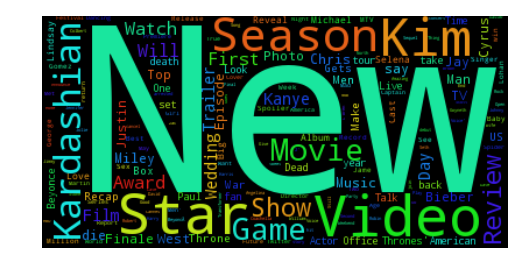

In [7]:
# Wordcloud for t category

wordcloud = WordCloud().generate(str_e)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()